vispirms jāiegūst gene lengths no gene annotations faila.

In [41]:
def calculate_gene_lengths_by_id(gtf_file_path):
    """
    Calculate the lengths of genes from a GTF file using gene_id as the unique identifier.

    :param gtf_file_path: Path to the GTF file.
    :return: A dictionary with gene_ids as keys and their lengths as values.
    """
    gene_lengths = {}

    with open(gtf_file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):  # Skip header lines
                continue
            fields = line.strip().split('\t')
            if fields[2] == 'gene':  # We're only interested in lines describing genes
                gene_info = fields[8]
                gene_id = [info for info in gene_info.split(';') if 'gene_id' in info][0]
                gene_id = gene_id.split('"')[1]

                start_position = int(fields[3])
                end_position = int(fields[4])
                gene_length = end_position - start_position #+ 1  ?

                gene_lengths[gene_id] = gene_length

    return gene_lengths


In [42]:
path_to_annotation=r"C:\Users\pauls\Downloads\gencode.v31.basic.annotation.gtf\gencode.v31.basic.annotation.gtf"
gene_lengths = calculate_gene_lengths_by_id(path_to_annotation)
for gene, length in gene_lengths.items():
    if gene == 'ENSG00000223972.5':
        print(f"{gene}: {length}")
    elif gene=='ENSG00000227232.5':
        print(f"{gene}: {length}")
    elif gene=='ENSG00000278267.1':
        print(f"{gene}: {length}")
    elif gene=='ENSG00000243485.5':
        print(f"{gene}: {length}")


ENSG00000223972.5: 2540
ENSG00000227232.5: 15166
ENSG00000278267.1: 67
ENSG00000243485.5: 1555


Tad jāiegūst gene counts count no gene counts faila.

In [13]:
def load_featureCounts_htseq(file_name):#Edgara
    counts = {}
    with open(file_name, 'r') as f:
        for line in f:
            description, gene, count = line.strip().split('\t')
            counts[gene] = int(count)

    return counts

In [43]:
counts_path=r"C:\Users\pauls\Desktop\big_data_IH\Dmitrijs\hpc_trenini\new_samples\RNS_FLT3_156.F.fastq.genome.htseq_counts.txt"
counts = load_featureCounts_htseq(counts_path)
#print top ten genes with highest count
for gene, count in sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{gene}: {count}")

: 21142641
ENSG00000276168.1: 1363436
ENSG00000263934.4: 78831
ENSG00000167658.16: 75931
ENSG00000245532.9: 66602
ENSG00000167978.17: 57242
ENSG00000169710.9: 54054
ENSG00000182095.14: 51467
ENSG00000087086.15: 47236
ENSG00000075624.16: 46182


TPMS aprēķināšana

In [44]:
def calculateTPM(counts, lengths):#Edgara

    # calculate read per kilobase
    RPK = {}
    for gene in counts:
        # Get the counts for this gene
        if gene != '':
            # print("gene " + gene + "counts {}", counts[gene])
            count = counts[gene]
            # Get the length for this gene
            length = lengths[gene]
            if length != 0 :
                RPK[gene] = count / length

    # Calculate “per million” scaling factor.
    scale = sum(RPK.values())

    tpm = {}

    for gene in RPK:
        # Get the counts for this gene
        tpm[gene] = RPK[gene] / scale * 1000000

    return tpm

In [ ]:
tpm = calculateTPM(counts, gene_lengths)
# print(tpm)
#print top 10 tpms
for gene, tpm in sorted(tpm.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{gene}: {tpm}")

top 10 TPM vizualizācija

In [46]:
import matplotlib.pyplot as plt
def plot_top_10_tpms(tpm,filename='top_10_tpm.jpg'):
    """
    Plot the top 10 TPMs

    :param TPM: A dictionary with gene_ids as keys and their TPM as values.
    """
    # Sort the genes by length and get the top 10
    top_10tpms = sorted(tpm.items(), key=lambda x: x[1], reverse=True)[:10]
    gene_ids = [gene[0] for gene in top_10tpms]
    tpm_value = [gene[1] for gene in top_10tpms]

    # Plotting
    plt.figure(figsize=(10, 8))
    bars = plt.bar(gene_ids, tpm_value, color='skyblue')

    # Adding the text on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}", ha='center', va='bottom')

    # Adding labels and title
    plt.xlabel('Gene ID')
    plt.ylabel('Transcripts per million')
    plt.title('Top 10 TPM')
    plt.xticks(rotation=45, ha='right')  # Rotate the gene ids for better readability
    plt.tight_layout()
    plt.savefig(filename, format='jpg', dpi=1000)

    # Show the plot
    plt.show()
    plt.close()


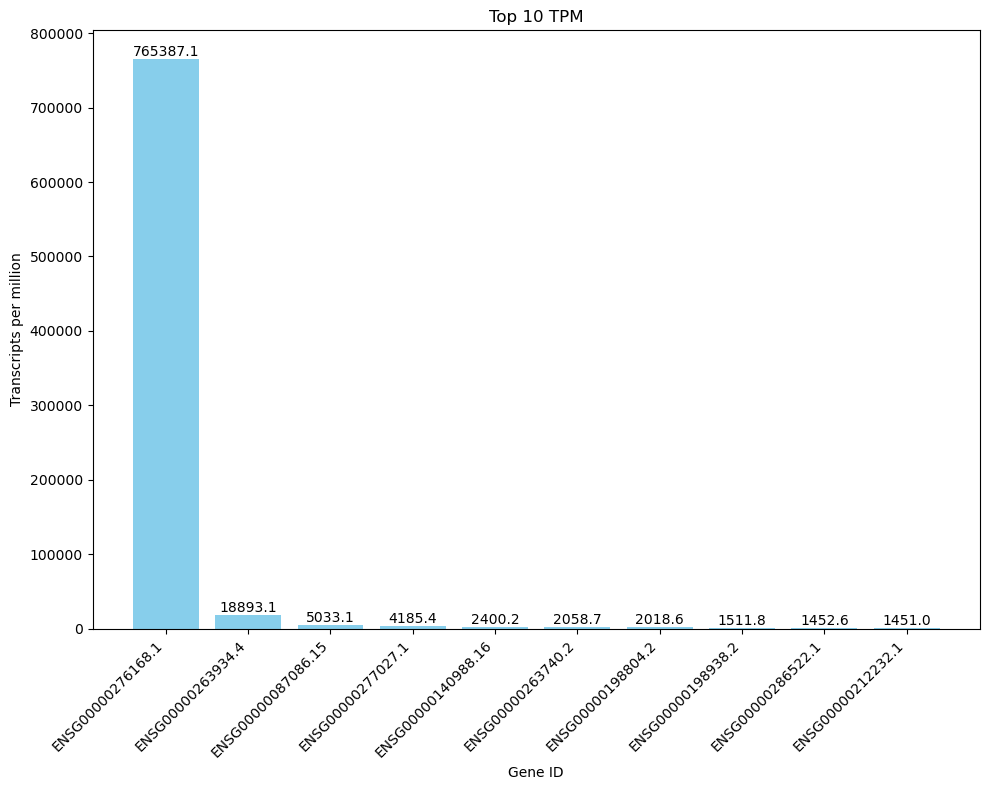

In [47]:
tpmdict=calculateTPM(counts, gene_lengths)
plot_top_10_tpms(tpmdict)